Clustering:
1. K-means
2. Fuzzy C-means
3. GMM
4. Practical Example (repeat for all 3)


# 1. K-means clustering 
a) Data genearation

b) Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

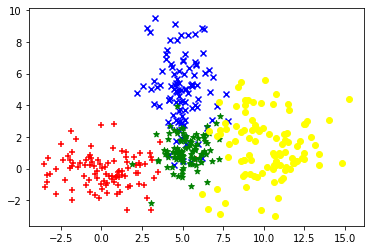

In [ ]:
np.random.seed(180010041),random.seed(180010041)

x1 = np.random.multivariate_normal([0.5,0], [[3, 0],[0, 1]], 100)
x2 = np.random.multivariate_normal([5,5], [[1, 0],[0, 4]], 100)
x3 = np.random.multivariate_normal([5,1], [[1, 0],[0, 1]], 100)
x4 = np.random.multivariate_normal([10,1.5], [[3, 0],[0, 4]], 100)

x = np.concatenate((x1,x2,x3,x4))

plt.scatter(x1[:,0],x1[:,1],color='r',marker='+')
plt.scatter(x2[:,0],x2[:,1],color='b',marker='x')
plt.scatter(x3[:,0],x3[:,1],color='green',marker='*')
plt.scatter(x4[:,0],x4[:,1],color='yellow')
plt.show()

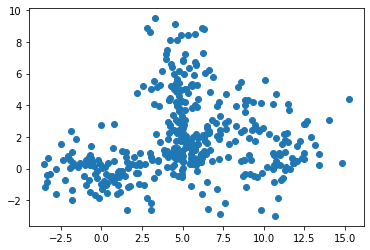

(400, 2)


In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.show()
print(x.shape)

## Cluster Initialization

a) Randomly initialize the cluster centers (any k- number of data points from the generated data)



[[9.74695524 4.74587282]
 [1.16279928 3.4837453 ]
 [9.61874785 4.84111853]
 [7.54611768 6.92256653]]


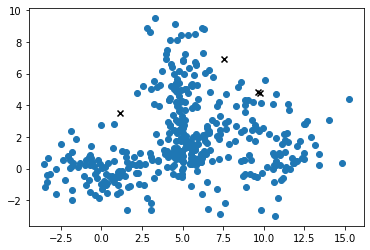

In [ ]:
# write your code here
mean_initial = 12 *(np.random.rand(4,2))
print(mean_initial)
plt.scatter(x[:,0],x[:,1])
plt.scatter(mean_initial[:,0],mean_initial[:,1],color='black',marker='x')
plt.show()

## Cluster assignment and re-estimation Stage 

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

In [ ]:
# write Your code here
def euclidean_distance(x1,x2):
  distance = 0
  for i in range(len(x1)):
    distance += (x1[i]- x2[i])**2
  return distance**(1/2)

# eulcidian_distance([1,2],[2,3]) 

class KMeans():
    def __init__(self,k=8,max_iterations=501):
        self.k = k
        self.max_iterations = max_iterations

    def _init_random_centroids(self, X):
        """ Initialize the centroids as k random samples of X"""
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    def _closest_centroid(self, sample, centroids):
        """ Return the index of the closest centroid to the sample """
        closest_i = 0
        closest_dist = float('inf')
        for i, centroid in enumerate(centroids):
            distance = euclidean_distance(sample, centroid)
            if distance < closest_dist:
                closest_i = i
                closest_dist = distance
        return closest_i

    def _create_clusters(self, centroids, X):
        """ Assign the samples to the closest centroids to create clusters """
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    def _calculate_centroids(self, clusters, X):
        """ Calculate new centroids as the means of the samples in each cluster  """
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    def _get_cluster_labels(self, clusters, X):
        """ Classify samples as the index of their clusters """
        # One prediction for each sample
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    def predict(self, X):
        """ Do K-Means clustering and return cluster indices """

        # Initialize centroids as k random samples from X
        centroids = self._init_random_centroids(X)

        # Iterate until convergence or for max iterations
        for _ in range(self.max_iterations): # Assign samples to closest centroids (create clusters)
            clusters = self._create_clusters(centroids, X) # Save current centroids for convergence check
            prev_centroids = centroids # Calculate new centroids from the clusters
            centroids = self._calculate_centroids(clusters, X) # If no centroids have changed => convergence
            diff = centroids - prev_centroids
            if not diff.any():
                break
            c = self._get_cluster_labels(clusters, X)
            plt.scatter(x[:,0],x[:,1],c=c, s=10)
            plt.scatter(centroids[:,0], centroids[:,1], c= "black", marker='X')
            plt.show()
        return self._get_cluster_labels(clusters, X)



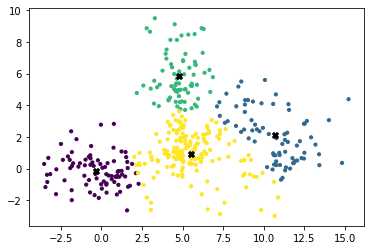

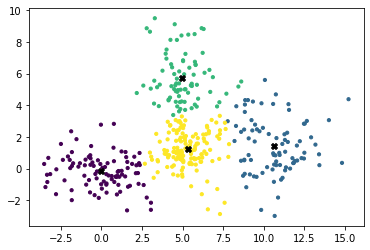

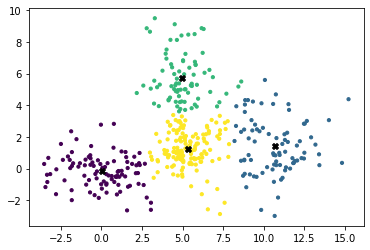

In [ ]:
# X = np.concatenate((x.T,y.T), axis=0)
kmeans = KMeans(4)
labels = kmeans.predict(x)

# 2. GMM Clustering

##1.  Data generation

a) Use the same data that you generated for K-means

## 2. Initialization

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

##3. Expectation stage
$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

## 3. Maximization stage
a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [ ]:
def calculate_covariance_matrix(X, Y=None):
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))
    return np.array(covariance_matrix, dtype=float)

class GaussianMixtureModel():
    def __init__(self, k=2, max_iterations=200, tolerance=1e-4):
        self.k = k
        self.parameters = []
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.responsibilities = []
        self.sample_assignments = None
        self.responsibility = None
        self.log_likeli = []

    def _init_random_gaussians(self, X):
        """ Initialize gaussian randomly """
        n_samples = np.shape(X)[0]
        self.priors = (1 / self.k) * np.ones(self.k)
        for i in range(self.k):
            params = {}
            params["mean"] = X[np.random.choice(range(n_samples))]
            params["cov"] = calculate_covariance_matrix(X)
            self.parameters.append(params)

    def multivariate_gaussian(self, X, params):
        """ Likelihood """
        n_features = np.shape(X)[1]
        mean = params["mean"]
        covar = params["cov"]
        determinant = np.linalg.det(covar)
        likelihoods = np.zeros(np.shape(X)[0])
        for i, sample in enumerate(X):
            d = n_features  # dimension
            coeff = (1.0 / (math.pow((2.0 * math.pi), d / 2)
                            * math.sqrt(determinant)))
            exponent = math.exp(-0.5 * (sample - mean).T.dot(np.linalg.pinv(covar)).dot((sample - mean)))
            likelihoods[i] = coeff * exponent

        return likelihoods

    def _get_likelihoods(self, X):
        """ Calculate the likelihood over all samples """
        n_samples = np.shape(X)[0]
        likelihoods = np.zeros((n_samples, self.k))
        for i in range(self.k):
            likelihoods[
                :, i] = self.multivariate_gaussian(
                X, self.parameters[i])
        return likelihoods

    def _expectation(self, X):
        """ Calculate the responsibility """
        # Calculate probabilities of X belonging to the different clusters
        weighted_likelihoods = self._get_likelihoods(X) * self.priors
        sum_likelihoods = np.expand_dims(np.sum(weighted_likelihoods, axis=1), axis=1)
        self.log_likeli.append(np.sum(sum_likelihoods))
        # Determine responsibility as P(X|y)*P(y)/P(X)
        self.responsibility = weighted_likelihoods / sum_likelihoods
        # Assign samples to cluster that has largest probability
        self.sample_assignments = self.responsibility.argmax(axis=1)
        # Save value for convergence check
        self.responsibilities.append(np.max(self.responsibility, axis=1))

    def _maximization(self, X):
        """ Update the parameters and priors """
        # Iterate through clusters and recalculate mean and covariance
        for i in range(self.k):
            resp = np.expand_dims(self.responsibility[:, i], axis=1)
            mean = (resp * X).sum(axis=0) / resp.sum()
            covariance = (X - mean).T.dot((X - mean) * resp) / resp.sum()
            self.parameters[i]["mean"], self.parameters[
                i]["cov"] = mean, covariance

        # Update weights
        n_samples = np.shape(X)[0]
        self.priors = self.responsibility.sum(axis=0) / n_samples

    def _converged(self, X):
        """ Covergence if || likehood - last_likelihood || < tolerance """
        if len(self.responsibilities) < 2:
            return False
        diff = np.linalg.norm(
            self.responsibilities[-1] - self.responsibilities[-2])
        # print ("Likelihood update: %s (tol: %s)" % (diff, self.tolerance))
        return diff <= self.tolerance

    def predict(self, X):
        """ Run GMM and return the cluster indices """
        # Initialize the gaussians randomly
        self._init_random_gaussians(X)
        log_likelihood = []
        # Run EM until convergence or for max iterations
        for _ in range(self.max_iterations):
            self._expectation(X)    # E-step
            self._maximization(X)   # M-step
            # Check convergence
            if self._converged(X):
                break
            print("Iteration #", _+1)
            plt.scatter(x[:,0],x[:,1],c=self.sample_assignments)
            cx = []
            cy = []
            for param in self.parameters:
              cx.append(param["mean"][0])
              cy.append(param["mean"][1])
            plt.scatter(cx,cy, c="red", marker = "^", s=50)
            plt.show()
        # Make new assignments and return them
        self._expectation(X)
        return self.log_likeli

## 4. Final run (EM algorithem)
a) initialization

b)Itterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each itteration

In [ ]:


log_l=[]
Itr=50
eps=10**(-6)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K=4   # no. of clusters
data = x
gmm = GaussianMixtureModel(4)
log_l = gmm.predict(data)

Output hidden; open in https://colab.research.google.com to view.

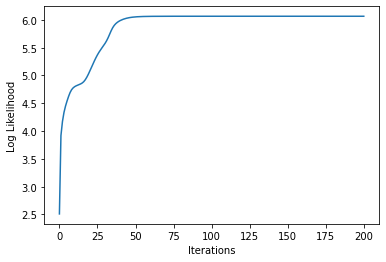

In [ ]:
plt.ylabel("Log Likelihood")
plt.xlabel("Iterations")
plt.plot(log_l)

# 3. Write a code and report similar demonstration for Fuzzy c-means



(Note : Generate the data such that you can demonstare the drawback of K-means, and able to solve through GMM and fuzzy C-means, have to demonstrate clearly during viva)



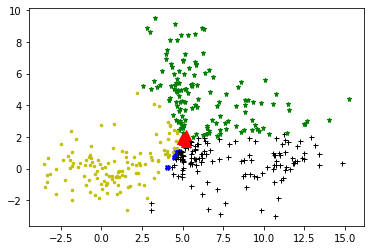

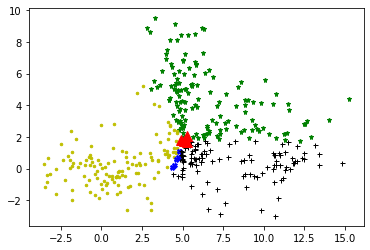

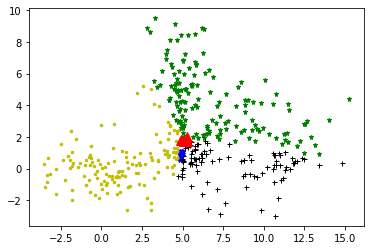

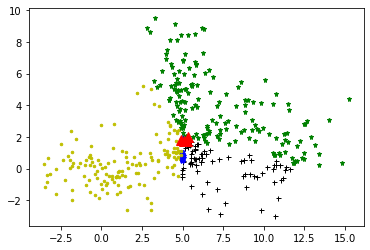

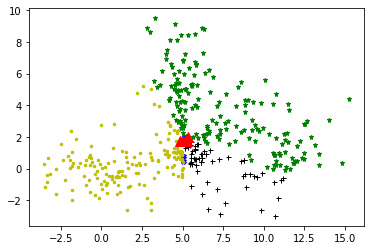

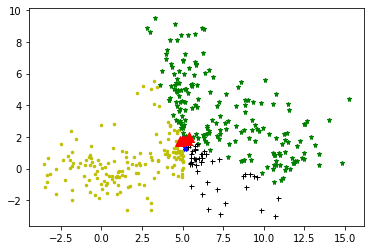

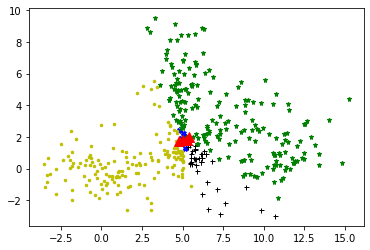

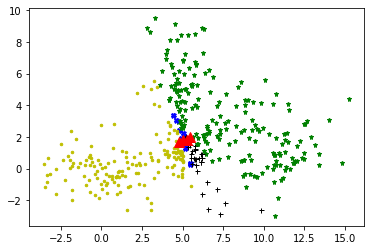

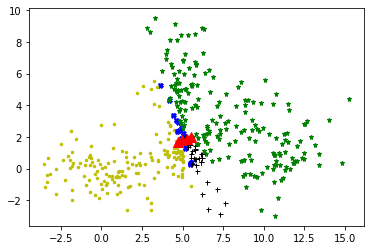

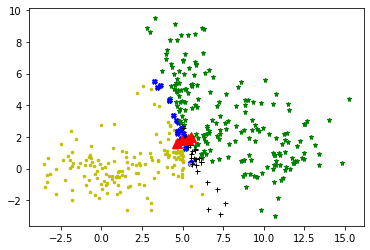

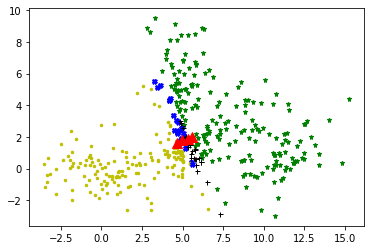

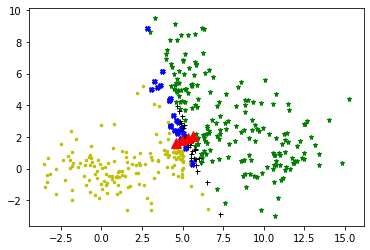

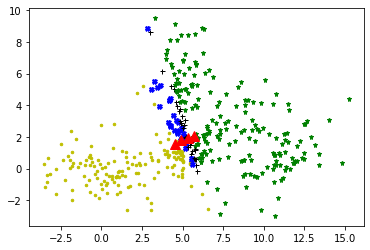

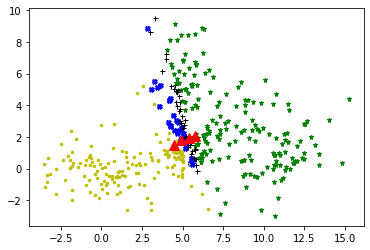

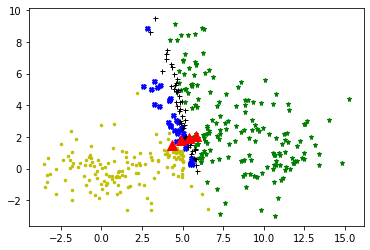

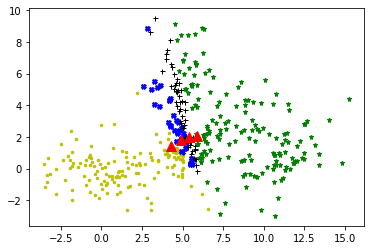

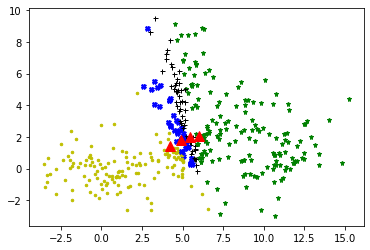

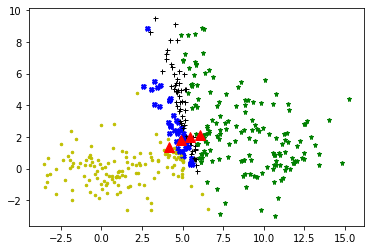

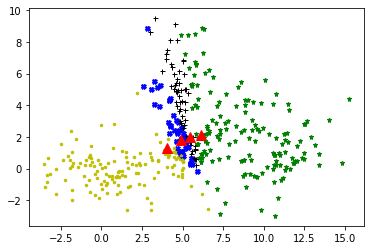

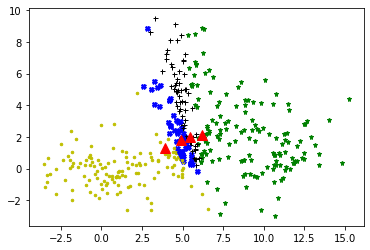

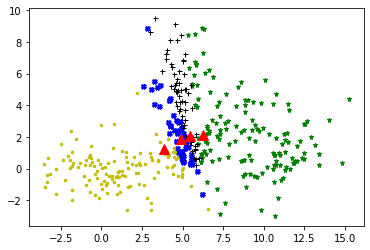

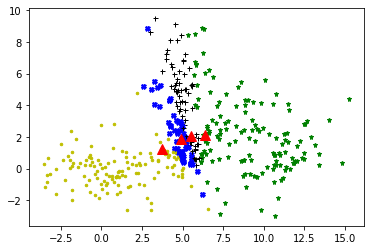

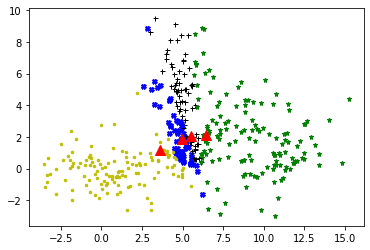

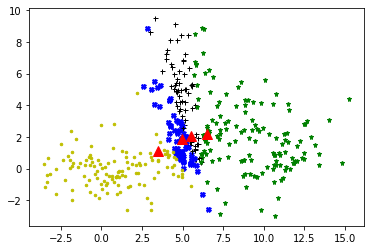

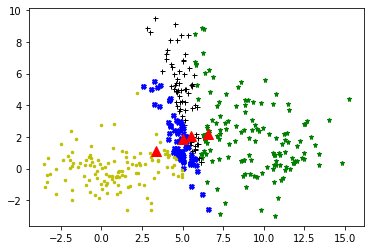

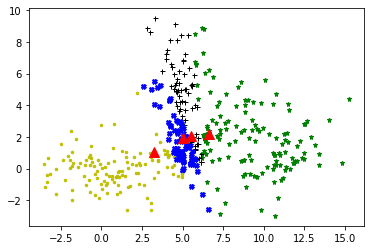

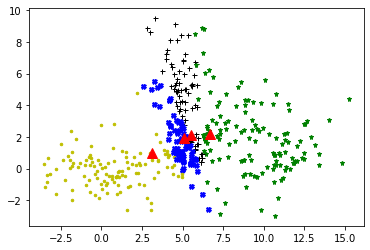

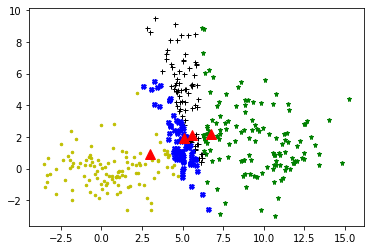

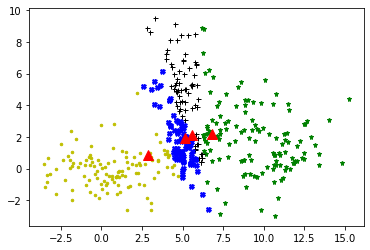

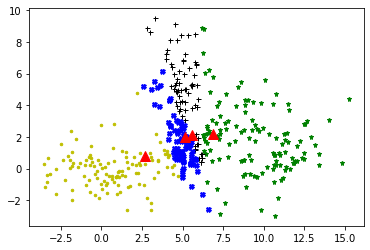

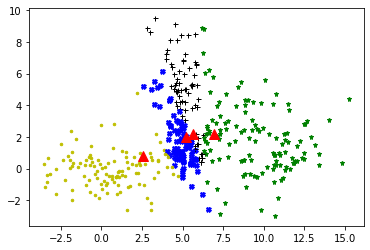

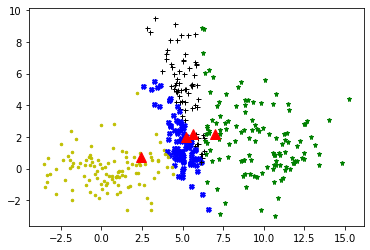

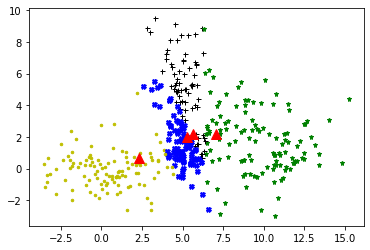

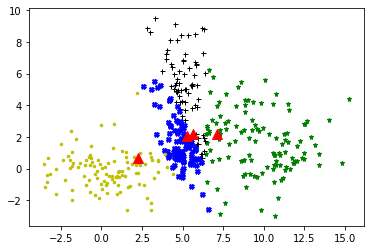

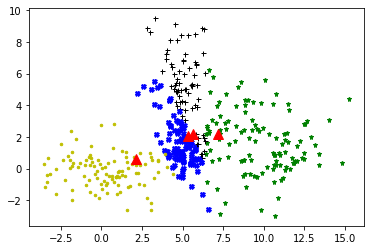

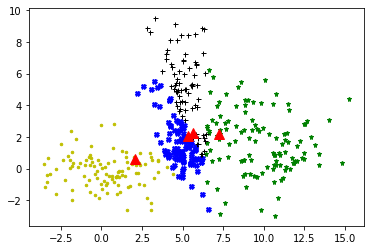

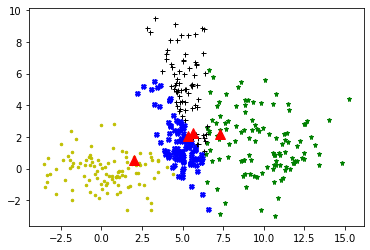

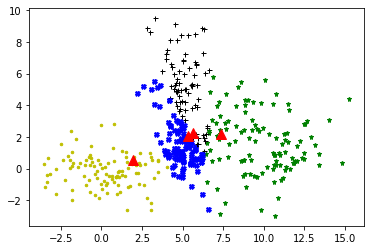

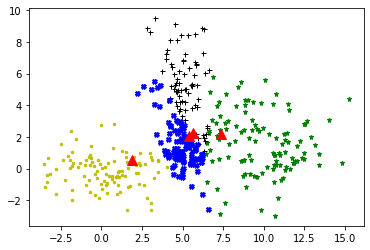

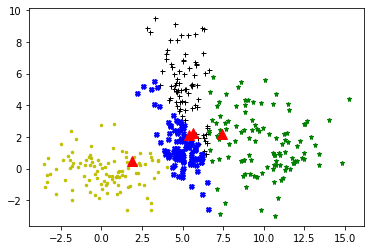

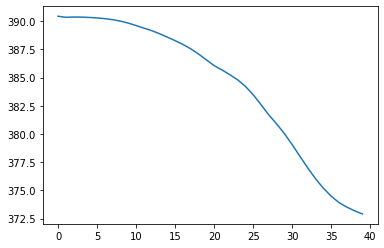

In [ ]:
from scipy.spatial.distance import euclidean as distance
class FuzzyCMeans:
    def __init__(self, k: int, r: int, n_iters: int, tol: float):
        self.k, self.n_iters, self.tol, self.p = k, n_iters, tol, r 

    def start(self, data):
        n,d = data.shape
        X = np.append(data, np.zeros((n, 1)), axis=1) # C: Centres, randomly initialsed weights
        C, weight, clr, mrk, sse = np.zeros((self.k,d)), np.random.dirichlet(np.ones(self.k),size=n), ['y','g','b','black'], ['.','*','X','+'], []
        for it in range(self.n_iters): # Step 1, Calc Centre based on weights
            C_old = C.copy()
            for j in range(self.k)  :   C[j] = sum([np.multiply(np.power(weight[i,j],self.p),X[i,:-1]) for i in range(n)])/sum(np.power(weight[:,j],self.p))
            if (abs(np.sum(C_old-C))) <= self.tol : 
                break
            for i in range(n):  #Step 2, Updating Weights
                denoSumNext = sum([np.power(1/distance(C[j,:], X[i,:-1]),1/(self.p-1)) for j in range(self.k)])
                for j in range(self.k)  :   weight[i,j] = np.power((1/distance(C[j,:], X[i,:-1])),1/(self.p-1))/denoSumNext 

                X[i,d] = np.where(weight[i] == np.amax(weight[i]))[0]
                for l in range(self.k):
                    if (X[i,d] == l)  :    plt.plot(X[i,0],X[i,1],'.',color=clr[l],marker=mrk[l],markersize=5)

            plt.plot(C[:,0],C[:,1],'^',color='red',markersize=10,label="Centres")
            plt.show()

            sse.append(sum([np.power(weight[i,j],self.p)*distance(C[j,:], X[i,:-1]) for i in range(n) for j in range(self.k)]))
        plt.plot(sse)
        plt.show()

# X = np.concatenate((x.T,y.T), axis=0)
fuzzy = FuzzyCMeans(k=4,r=2,n_iters=50,tol=1e-4)
fuzzy.start(x)

# 4. Practical Example



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Using K-means

a) Data preparation




1. Load Mnist data
2. Take only two class '1' and '5'




In [ ]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=c08448f85f8daf4b446743df169542b7f80b81b0090a5f36cd28f9ed7fd6ed4d
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


(60000, 28, 28)
[5 0 4 ... 5 6 8]


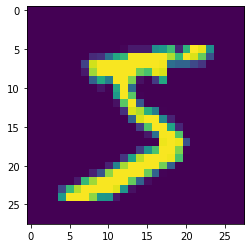

labels:  5


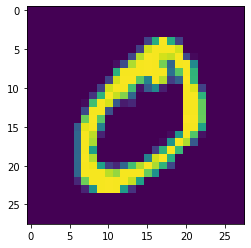

labels:  0


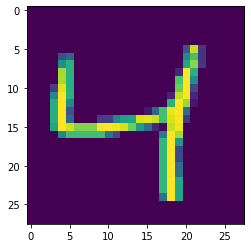

labels:  4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

file1='/content/drive/My Drive/clustering/train-images.idx3-ubyte'
file2='/content/drive/My Drive/clustering/train-labels.idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

print(Images.shape)
print(labels)
iter = 0
for i in Images:
  plt.imshow(np.reshape(i,(28,28)))
  plt.show()
  print("labels: ", labels[iter])
  iter+=1
  if iter>2:
    break
# write you code here

2. Write a function of Kmeans as written earlier

In [ ]:
class KMeans():
    def __init__(self,k=8,max_iterations=200):
        self.k = k
        self.max_iterations = max_iterations

    def _init_random_centroids(self, X):
        """ Initialize the centroids as k random samples of X"""
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    def _closest_centroid(self, sample, centroids):
        """ Return the index of the closest centroid to the sample """
        closest_i = 0
        closest_dist = float('inf')
        for i, centroid in enumerate(centroids):
            distance = euclidean_distance(sample, centroid)
            if distance < closest_dist:
                closest_i = i
                closest_dist = distance
        return closest_i,closest_dist

    def _create_clusters(self, centroids, X):
        """ Assign the samples to the closest centroids to create clusters """
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        error=0
        for sample_i, sample in enumerate(X):
            centroid_i,error_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
            error += error_i
        return clusters,error

    def _calculate_centroids(self, clusters, X):
        """ Calculate new centroids as the means of the samples in each cluster  """
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    def _get_cluster_labels(self, clusters, X):
        """ Classify samples as the index of their clusters """
        # One prediction for each sample
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    def predict(self, X):
        """ Do K-Means clustering and return cluster indices """

        # Initialize centroids as k random samples from X
        centroids = self._init_random_centroids(X)
        error=[]
        # Iterate until convergence or for max iterations
        for i in range(self.max_iterations):
            # Assign samples to closest centroids (create clusters)
            clusters,error_i = self._create_clusters(centroids, X)
            error.append([i,error_i])
            # Save current centroids for convergence check
            prev_centroids = centroids
            # Calculate new centroids from the clusters
            centroids = self._calculate_centroids(clusters, X)
            # If no centroids have changed => convergence
            diff = centroids - prev_centroids
            if not diff.any():
                break
            c = self._get_cluster_labels(clusters, X)
            # plt.scatter(x[:,0],x[:,1],c=c, s=10)
            # plt.scatter(centroids[:,0], centroids[:,1], c= "black", marker='X')
            # plt.show()
        error = np.array(error)
        return self._get_cluster_labels(clusters, X),centroids,error


In [ ]:
X = Images
X = X.reshape(len(X),-1)
y = labels
X = X.astype(float)/255.

X_train = []
Y_train = []
for i in range(X.shape[0]):
  if y[i] == 1 or y[i] == 5:
    X_train.append(X[i])
    Y_train.append(y[i])

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

print(X_train.shape)
print(Y_train.shape)

(12163, 784)
(12163,)


3. Call the K-means function and plot the mean vectors of the cluster

In [ ]:
kmeans = KMeans(2)
y_pred,centroid,error = kmeans.predict(X_train)

for i in range(y_pred.shape[0]):
  if y_pred[i]!=1:
    y_pred[i] = 5

print(y_pred.shape)
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_train,y_pred))

(12163,)
0.09117816328208501


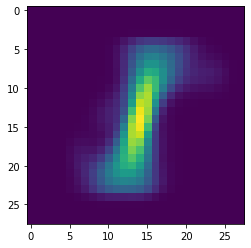

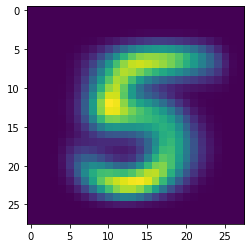

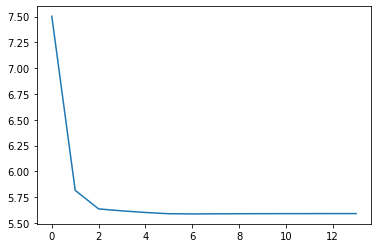

In [ ]:
buffer = centroid
plt.imshow(np.reshape(centroid[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(centroid[1,:],(28,28)))
plt.figure()
plt.plot(error[:,0],error[:,1]/len(X_train))

# 5. Perform the same task for GMM and fuzzy c-means

In [ ]:
def calculate_covariance_matrix(X, Y=None):
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)

class GaussianMixtureModel():
    def __init__(self, k=2, max_iterations=200, tolerance=1e-4):
        self.k = k
        self.parameters = []
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.responsibilities = []
        self.sample_assignments = None
        self.responsibility = None
        self.log_likeli = []

    def _init_random_gaussians(self, X):
        """ Initialize gaussian randomly """
        n_samples = np.shape(X)[0]
        self.priors = (1 / self.k) * np.ones(self.k)
        for i in range(self.k):
            params = {}
            params["mean"] = X[np.random.choice(range(n_samples))]
            params["cov"] = calculate_covariance_matrix(X)
            self.parameters.append(params)

    def multivariate_gaussian(self, X, params):
        """ Likelihood """
        n_features = np.shape(X)[1]
        mean = params["mean"]
        covar = params["cov"]
        determinant = np.linalg.det(covar)
        likelihoods = np.zeros(np.shape(X)[0])
        for i, sample in enumerate(X):
            d = n_features  # dimension
            # c1 = ((2.0 * math.pi)** d / 2)
            c1 = math.sqrt(determinant)
            # print(c1)
            if c1!=0:
                for power in range(int(d/2)):
                  if c1<math.inf:
                    c1 *= 2.0*math.pi
                  else :
                    c1 = math.inf
                    break
            # print(c1)
            # coeff = (1.0 / (math.pow((2.0 * math.pi), d / 2)
            #                 * math.sqrt(determinant)))
            coeff = (1.0/(c1 + 10**-6))
            exponent = math.exp(-0.5 * (sample - mean).T.dot(np.linalg.pinv(covar)).dot((sample - mean)))
            likelihoods[i] = coeff * exponent

        return likelihoods

    def _get_likelihoods(self, X):
        """ Calculate the likelihood over all samples """
        n_samples = np.shape(X)[0]
        likelihoods = np.zeros((n_samples, self.k))
        for i in range(self.k):
            likelihoods[
                :, i] = self.multivariate_gaussian(
                X, self.parameters[i])
        return likelihoods

    def _expectation(self, X):
        """ Calculate the responsibility """
        # Calculate probabilities of X belonging to the different clusters
        weighted_likelihoods = self._get_likelihoods(X) * self.priors
        sum_likelihoods = np.expand_dims(np.sum(weighted_likelihoods, axis=1), axis=1)
        self.log_likeli.append(np.sum(sum_likelihoods))
        # Determine responsibility as P(X|y)*P(y)/P(X)
        self.responsibility = weighted_likelihoods / sum_likelihoods
        # Assign samples to cluster that has largest probability
        self.sample_assignments = self.responsibility.argmax(axis=1)
        # Save value for convergence check
        self.responsibilities.append(np.max(self.responsibility, axis=1))

    def _maximization(self, X):
        """ Update the parameters and priors """
        # Iterate through clusters and recalculate mean and covariance
        for i in range(self.k):
            resp = np.expand_dims(self.responsibility[:, i], axis=1)
            mean = (resp * X).sum(axis=0) / resp.sum()
            covariance = (X - mean).T.dot((X - mean) * resp) / resp.sum()
            self.parameters[i]["mean"], self.parameters[
                i]["cov"] = mean, covariance

        # Update weights
        n_samples = np.shape(X)[0]
        self.priors = self.responsibility.sum(axis=0) / n_samples

    def _converged(self, X):
        """ Covergence if || likehood - last_likelihood || < tolerance """
        if len(self.responsibilities) < 2:
            return False
        diff = np.linalg.norm(
            self.responsibilities[-1] - self.responsibilities[-2])
        # print ("Likelihood update: %s (tol: %s)" % (diff, self.tolerance))
        return diff <= self.tolerance

    def predict(self, X):
        """ Run GMM and return the cluster indices """
        # Initialize the gaussians randomly
        self._init_random_gaussians(X)
        log_likelihood = []
        error=[]
        # Run EM until convergence or for max iterations
        for i in range(self.max_iterations):
            print("Iteration: ",i)
            self._expectation(X)    # E-step
            self._maximization(X)   # M-step
            # Check convergence
            if self._converged(X):
                break
            # print("Iteration #", _+1)
            # plt.scatter(x[:,0],x[:,1],c=self.sample_assignments)
            # cx = []
            # cy = []
            # for param in self.parameters:
            #   cx.append(param["mean"][0])
            #   cy.append(param["mean"][1])
            # plt.scatter(cx,cy, c="red", marker = "^", s=50)
            # plt.show()
            # error.append(self.tolen)
        # Make new assignments and return them
        self._expectation(X)
        return self.log_likeli,self.parameters['mean']

In [ ]:
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X,buffer):
        self.initialize(X)
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
        return buffer
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i],cov = 1)
                # cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2423: RuntimeWarning: invalid value encountered in less
  if any(aweights < 0):


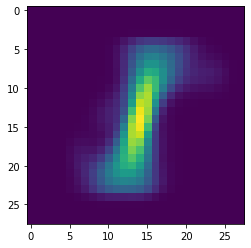

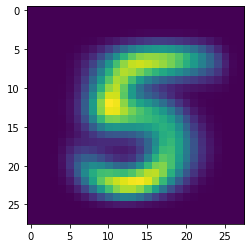

In [ ]:
buffer = centroid

gmm = GMM(k = 2, max_iter = 50 )
cents1 = gmm.fit(X_train,buffer)

plt.imshow(np.reshape(cents1[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents1[1,:],(28,28)))

# gmm = GaussianMixtureModel(2)
# y_pred,centroid = gmm.predict(X_train.T)
# for i in range(y_pred.shape[0]):
#   if y_pred[i]!=1:
#     y_pred[i] = 5

# print(y_pred.shape)
# from sklearn.metrics import accuracy_score

# # print(accuracy_score(Y_train,y_pred))
# acc = accuracy_score(Y_train,y_pred)
# if acc>0.5 :
#   print(acc)
# else :
#   print(1-acc)


<Figure size 432x288 with 0 Axes>

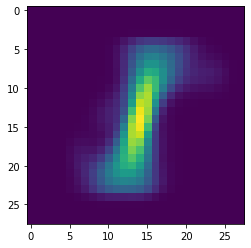

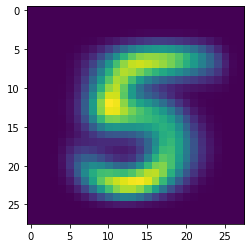

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.imshow(np.reshape(centroid[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(centroid[1,:],(28,28)))
plt.figure()
# plt.plot(error[:,0],error[:,1]/len(X_train))

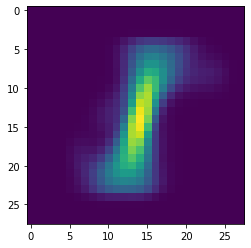

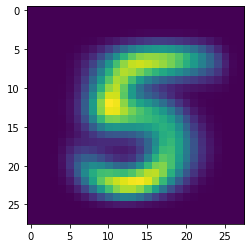

In [ ]:
class FCM:
    def __init__(self, k: int, r: int, n_iters: int, tol: float):
        self.k, self.n_iters, self.tol, self.p = k, n_iters, tol, r

    def start(self, data, buffer):
        n,d = data.shape
        X = np.append(data, np.zeros((n, 1)), axis=1)
        
        # C: Centres, randomly initialsed weights
        C, weight, sse = np.zeros((self.k,d)), np.random.dirichlet(np.ones(self.k),size=n), []
        self.center = buffer
        for it in range(self.n_iters):
            # Step 1, Calc Centre based on weights
            C_old = C.copy()
            for j in range(self.k)  :   C[j] = sum([np.multiply(np.power(weight[i,j],self.p),X[i,:-1]) for i in range(n)])/sum(np.power(weight[:,j],self.p))
            if (abs(np.sum(C_old-C))) <= self.tol :
                break
        
            #Step 2, Updating Weights
            for i in range(n):
                denoSumNext = sum([np.power(1/distance(C[j,:], X[i,:-1]),1/(self.p-1)) for j in range(self.k)])
                for j in range(self.k)  :   weight[i,j] = np.power((1/distance(C[j,:], X[i,:-1])),1/(self.p-1))/denoSumNext 

                X[i,d] = np.where(weight[i] == np.amax(weight[i]))[0]

            sse.append(sum([np.power(weight[i,j],self.p)*distance(C[j,:], X[i,:-1]) for i in range(n) for j in range(self.k)]))

        self.centre = C.copy()

fcm = FCM(k=2,r=3,n_iters=50,tol=1e-9)
fcm.start(X_train,buffer)
centres = fcm.center
# error = k.sse

plt.imshow(np.reshape(centres[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(centres[1,:],(28,28)))

# plt.figure()
# plt.plot(error)

# 6. Repeat the same for 3 class and perform the K-means, GMM and Fuzzy c-means clustering

In [ ]:
X = Images
X = X.reshape(len(X),-1)
y = labels
X = X.astype(float)/255.

X_train = []
Y_train = []
for i in range(X.shape[0]):
  if y[i] == 1 or y[i] == 5 or y[i] == 0:
    X_train.append(X[i])
    Y_train.append(y[i])

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

print(X_train.shape)
print(Y_train.shape)

(18086, 784)
(18086,)


In [ ]:
kmeans = KMeans(3)
y_pred,centroid,error = kmeans.predict(X_train)

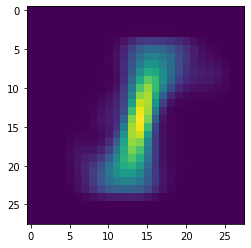

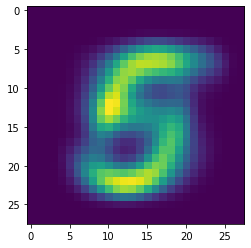

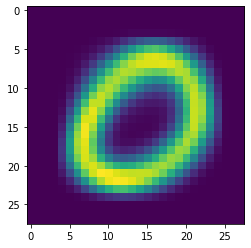

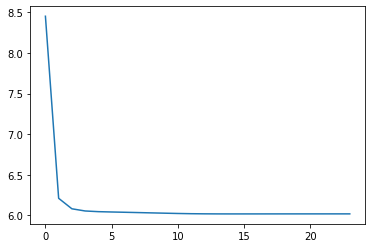

In [ ]:
buffer = centroid
plt.imshow(np.reshape(centroid[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(centroid[1,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(centroid[2,:],(28,28)))
plt.figure()
plt.plot(error[:,0],error[:,1]/len(X_train))

In [ ]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X,buffer):
        self.initialize(X)
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
        return buffer
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i],cov = 1)
                # cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2423: RuntimeWarning: invalid value encountered in less
  if any(aweights < 0):


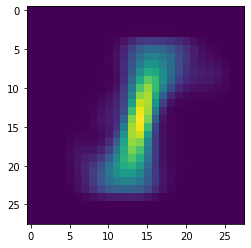

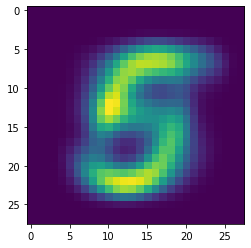

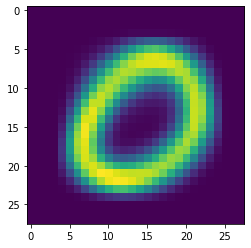

In [43]:
buffer = centroid
gmm = GMM(k = 2, max_iter = 50 )
cents1 = gmm.fit(X_train,buffer)

plt.imshow(np.reshape(cents1[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents1[1,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents1[2,:],(28,28)))

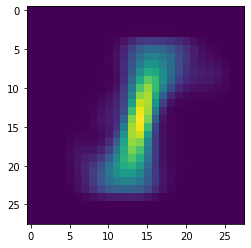

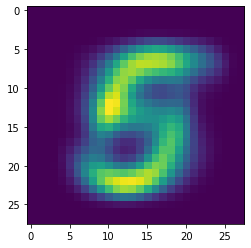

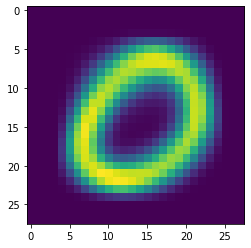

In [44]:
class FCM:
    def __init__(self, k: int, r: int, n_iters: int, tol: float):
        self.k, self.n_iters, self.tol, self.p = k, n_iters, tol, r

    def start(self, data, buffer):
        n,d = data.shape
        X = np.append(data, np.zeros((n, 1)), axis=1)
        
        # C: Centres, randomly initialsed weights
        C, weight, sse = np.zeros((self.k,d)), np.random.dirichlet(np.ones(self.k),size=n), []
        self.center = buffer
        for it in range(self.n_iters):
            # Step 1, Calc Centre based on weights
            C_old = C.copy()
            for j in range(self.k)  :   C[j] = sum([np.multiply(np.power(weight[i,j],self.p),X[i,:-1]) for i in range(n)])/sum(np.power(weight[:,j],self.p))
            if (abs(np.sum(C_old-C))) <= self.tol :
                break
        
            #Step 2, Updating Weights
            for i in range(n):
                denoSumNext = sum([np.power(1/distance(C[j,:], X[i,:-1]),1/(self.p-1)) for j in range(self.k)])
                for j in range(self.k)  :   weight[i,j] = np.power((1/distance(C[j,:], X[i,:-1])),1/(self.p-1))/denoSumNext 

                X[i,d] = np.where(weight[i] == np.amax(weight[i]))[0]

            sse.append(sum([np.power(weight[i,j],self.p)*distance(C[j,:], X[i,:-1]) for i in range(n) for j in range(self.k)]))

        self.centre = C.copy()

fcm = FCM(k=3,r=3,n_iters=50,tol=1e-9)
fcm.start(X_train,buffer)
centres = fcm.center
# error = k.sse

plt.imshow(np.reshape(centres[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(centres[1,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(centres[2,:],(28,28)))

# plt.figure()
# plt.plot(error)

# 7. Perform DBSCAN and show the advantages of DBSCAN over model and distance based clustering. 

expected: (should visualize the cluster pattern that Model and distance based clustering can not able to capture but can be captured through DBSCAN)

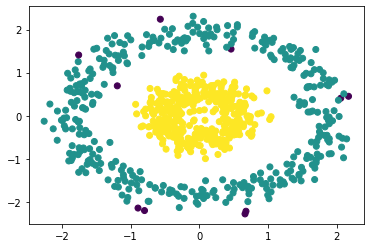

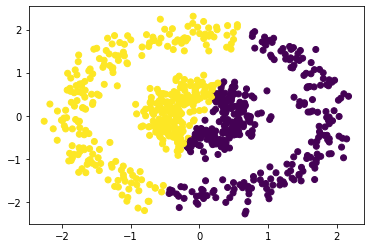

Number of clusters: 2
Homogeneity: 1.0
Completeness: 0.9185311323491359


In [55]:
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
y_kmeans = KMeans(2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()
plt.scatter(X[:,0], X[:,1], c=y_kmeans)
plt.show()
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))

# 8. Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.


**Divisive Clustering:**

It is an opposite of Agglomerative clustering. In this we start from one cluster which contains all data points in one.  Iteratively we separate all the cluster of points which aren't similar in characteristics. It is also called top-bottom approach.



## Agglomerative Clustering:

Lets start with some domy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [46]:
import numpy as np
def Euclidian_Dist(x,y):
  return np.sqrt(np.sum(np.square(x-y)))

def Dist_mat(X):
  dist = []
  for i in range(len(X)):
    dist_mat = []
    for j in range(len(X)):
      dist_mat.append(Euclidian_Dist(X[i],X[j]))
    dist.append(dist_mat)
  return dist

def combine(X):
  dist_mat = Dist_mat(X)
  # print(dist_mat)
  mini, minj = -1,-1
  min = math.inf
  for i in range(len(X)):
    for j in range(len(X)):
      if i!=j and min>dist_mat[i][j]:
        min = dist_mat[i][j]
        mini = i
        minj = j
  newX = X
  # print(newX)
  # print(len(X))
  print(mini+1, minj+1)
  newX[mini] = (1/2)*(X[mini]+X[minj])
  newX = np.delete(newX, minj,0)
  # newX = np.reshape(newX,(X.shape[0],X.shape[1]-1))
  return newX


In [47]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

#write your code here
## velidate from inbuilt Dendogram

while len(X)>1:
  X = combine(X)

import plotly.figure_factory as ff

X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

1 2


## Divisive clustering:

It is a top down approach of hierarchial clustering

Lets start with some domy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$



1.   Find the biggest cluster (having highest diameter), initially the single cluster is the biggest cluster.

$$Diameter_{cluster}=\max_{i,j}||x_{i}-x_{j}||_{2}$$

$i,j$ will move over all the elements in the cluster.

2.  find the splinter element of the cluster by using the maximum average distance between the other elements. 
$$d_{k}=\frac{1}{N-1}\sum_{i=1}^{N}||x_{k}-x_{i}||_{2}$$
$splinter-group-element=arg \max_{1 \leq k \leq N} (d_{k})$

repeat the same and assign element to the splinter group untill the differance between average incluster distance and average splinter group distance of each element turns negative.

$$d_{avgsplint_{k}}=\frac{1}{M-1}\sum_{i=1}^{M}||x_{k}-x_{i}||_{2}$$

Stop: $$d_{k}-d_{avgsplint_{k}}<0$$
 and assign the splinter group as a new cluster.

 3. Repeat the step 1 and 2 untill each cluster have only one element.

 4.**Plot the cluster split with respect to their diameter** 












In [ ]:
import numpy as np
def Euclidian_Dist(x,y):
  return np.sqrt(np.sum(np.square(x-y)))

def Dist_mat(X):
  dist = []
  for i in range(len(X)):
    dist_mat = []
    for j in range(len(X)):
      dist_mat.append(Euclidian_Dist(X[i],X[j]))
    dist.append(dist_mat)
  return dist


def avg_distance(X):
  sum = 0
  for point in X:
    for i in range(len(X)):
      sum += Euclidian_Dist(point, X[i])
  avg = 2*sum/(len(X)*(len(X)-1))
  return avg

In [ ]:
def get_diameter(X, i):
    """Returns the diameter of the ith cluster in X"""
    max = 0
    for k in range(len(X[i])):
      for l in range(len(X[i])):
        if max< Euclidian_Dist(X[i][l], X[i][k]):
          max = Euclidian_Dist(X[i][l], X[i][k])
    return max

def get_biggest_cluster(X):
    """ Returns the cluster index having largest diameter"""
    max = -1
    index = -1
    for i in range(len(X)):
      if max < get_diameter(X[i]):
        max = get_diameter(X[i])
        index = i
    return index
    
def avg_spl_dists(cluster, splinter):
    """ Return the average of distances of each point belonging to cl wrt splinter"""
    #write your code here
    return avg_dists

In [50]:
global g
import time

def subtract(indices,splinter):
	l = [x for x in indices if x not in splinter]
	return l
	
def divisive(a,indices,splinter,sub):
	if(len(indices)==1):
		return
	avg=[]
	flag=0
	for i in indices:
		if(i not in splinter):
			sum=0
			for j in indices:
				if(j not in splinter):
					sum=sum+a[i][j]
			if((len(indices)-len(splinter)-1)==0):
				avg.append(sum)
			else:
				avg.append(sum/(len(indices)-len(splinter)-1))
	if(splinter):
		k=0
		for i in sub:
			total=0
			for j in splinter:	
				total=total+a[i][j]
			avg[k]=avg[k] - (total/(len(splinter)))
			k+=1
		positive=[]				
		for i in range(0,len(avg)):
			if(avg[i]>0):
				positive.append(avg[i])
				flag=1
		if(flag==1):
			splinter.append(sub[avg.index(max(positive))])
			sub.remove(sub[avg.index(max(positive))])
			divisive(a,indices,splinter,sub)
	else:
		splinter.append(indices[avg.index(max(avg))])
		sub[:]=subtract(indices,splinter)
		divisive(a,indices,splinter,sub)

def original_subset(indices):
	sp=np.zeros(shape=(len(indices),len(indices))) 
	for i in range(0,len(indices)):
		for j in range(0,len(indices)):
			sp[i][j]=a[indices[i]][indices[j]]
	return sp
	
def original_max(x):
	new=original_subset(x)
	return new.max()

def diameter(l):
	return original_max(l)
	
def recursive(a,indices,u,v,clusters,g):
	clus_s.append(len(indices))
	d.append(diameter(indices))
	parents[g]=indices
	g-=1
	divisive(a,indices,u,v)
	clusters.append(u)
	clusters.append(v)
	new=[]
	for i in range(len(clusters)):
		new.append(clusters[i])
	final.append(new)
	x=[]
	y=[]
	store_list=[]
	max=-1
	f=0
	for list in clusters:
		if(diameter(list)>max):
			if(len(list)!=1):
				f=1
				max=diameter(list)
				store_list=(list)
	if(f==0):
		return
	else:
		clusters.remove(store_list)	
		recursive(a,store_list,x,y,clusters,g)

In [ ]:
# Implement Divisive Clustering 
import numpy as np
X = np.array([[1,1], [2,1], [5,4], [6,5], [6.5,6]])
# X = X.transpose() # Shape after transpose: [2, 5]
num_points = X.shape[1]
print(f'X:\n {X}')

a = Dist_mat(X);
size=len(a)
g=(size-1)*2
parents={}
final=[]
clusters=[]
indices=[]
clus_s=[]
d=[]
Z=np.zeros(shape=(size-1,4))
p=[]
q=[]
ans=[]
for i in range(0,len(a)):
	indices.append(i)

for i in range(0,size):
	list=[]
	list.append(i)
	parents[i]=list

recursive(a,indices,p,q,clusters,g)
for i in range(0,len(d)):
	Z[size-i-2][2]=d[i]
	Z[size-i-2][3]=clus_s[i]

for i in range(len(final)-1,0,-1):
	for j in range(0,len(final[i-1])):
		if final[i-1][j] not in final[i]:
			ans.append(final[i-1][j])

ans.append(indices)
for i in range(0,len(ans)):
	if(len(ans[i])<=2):
		Z[i][0]=ans[i][0]
		Z[i][1]=ans[i][1]
	else:
		s=0
		add=[]
		common=[]
		for j in range(len(ans)-1,-1,-1):
			if(set(ans[j])<set(ans[i])):
				common=ans[j]
				break;
		x=(subtract(ans[i],common))
		for key in parents.keys():
			if(parents[key]==common):
				Z[i][0]=key
				break;
		for key in parents.keys():
			if(set(parents[key])==set(x)):
				Z[i][1]=key
				s=1
				break;
		if(s==0):
			print(Z[i][0],Z[i][1],x)  

print(final)
abcd = 1;
for li in final:
  print("\nClusters after", abcd, "th division");
  num = len(li);
  q = [];
  for i in range(num):
    d = [];
    for j in li[i]:
      d.append(X[j]);
    d = np.array(d)
    print(d);
  abcd += 1;
Y = X.transpose();
import plotly.figure_factory as ff
lab=np.linspace(1,Y.shape[1],Y.shape[1])
fig = ff.create_dendrogram(Y.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

# 9.Take a real data example and demonstrate both Agglomerative and Divisive clustering.

(200, 5)


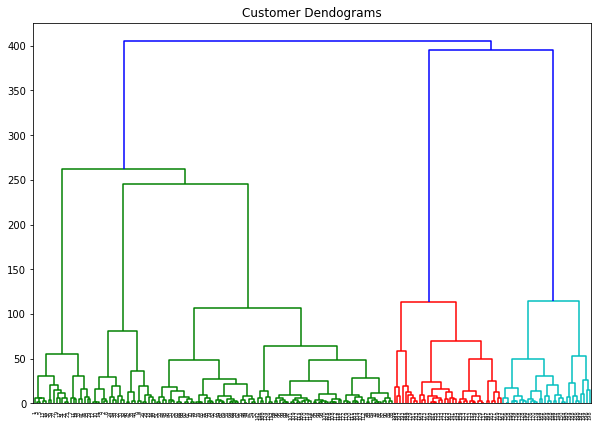

In [52]:
import scipy.cluster.hierarchy as shc
import pandas as pd

customer_data = pd.read_csv('/content/drive/My Drive/clustering/shopping-data.csv')
print(customer_data.shape)
data = customer_data.iloc[:, 3:5].values


plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')